# Behavioral Cloning

The goals / steps of this project are

* Use the simulator to collect data of good driving behavior
* Build, a convolution neural network that predicts steering angles from images
* Train and validate the model with a training and validation set
* Test that the model successfully drives around track one without leaving the road


In [1]:
import csv
import os
import sklearn
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

DATA_DIR = "data"





# Data collection

To capture driving behavior, I drove 2 times around the track both in right and reverse directions to balance out the data. I also downloaded the dataset provided by Udacity in the workspaces.

I managed to collect a total of 16555 data points for track 1. A summary of the results is shown below.

In [2]:
measurements = pd.read_csv('data/driving_log.csv', skipinitialspace=True)
print('Table shape: ', measurements.shape)
print('Columns: ', measurements.columns.values)
print('Steering stats:')
print(measurements.steering.describe())

measurements.head()


Table shape:  (16555, 7)
Columns:  ['center' 'left' 'right' 'steering' 'throttle' 'brake' 'speed']
Steering stats:
count    16555.000000
mean        -0.001185
std          0.154108
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: steering, dtype: float64


,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


# Data Exploration

I then looked at the data and tried plotting images from all camera angles. The following two cells show a random set of images. So, if we include data from all camera angles we have 3 * 16555 data points.

center      /Users/sumit/code/udacity/sdcarnd/CarND-Behavi...
left        /Users/sumit/code/udacity/sdcarnd/CarND-Behavi...
right       /Users/sumit/code/udacity/sdcarnd/CarND-Behavi...
steering                                                    0
throttle                                             0.164865
brake                                                       0
speed                                                 8.00124
Name: 10044, dtype: object
image shape: (160, 320, 3)


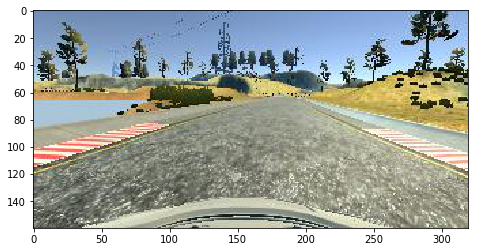

In [3]:
plt.figure(figsize=(10,4))
index = np.random.randint(0, measurements.shape[0])
random_image = measurements.iloc[index]
print(random_image)

image = cv2.imread("data/IMG/%s" % (random_image.center.split("/")[-1]))
print('image shape:', image.shape)
plt.figure(1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

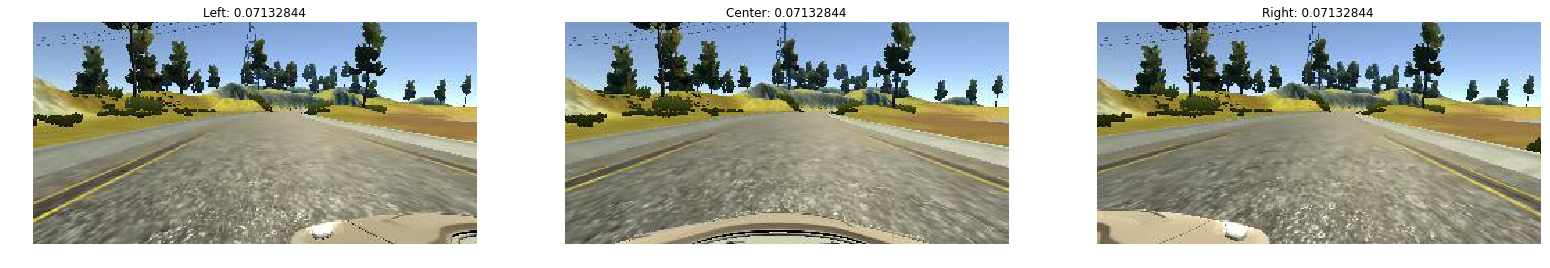

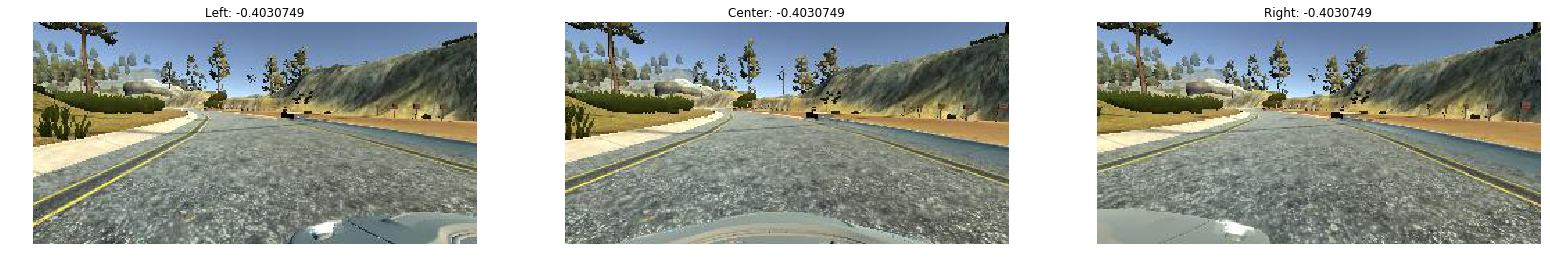

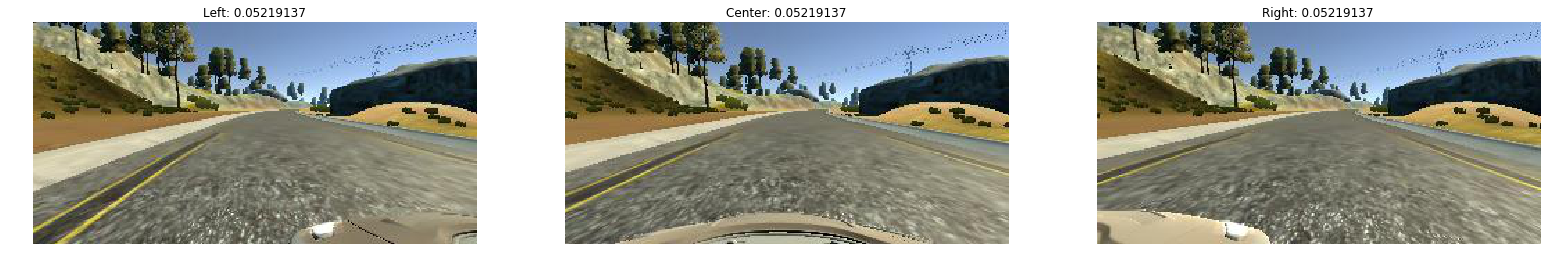

In [4]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(27, 9))


index = np.random.randint(0, len(measurements))
random_image = measurements.iloc[index]
image1 = cv2.imread(os.path.join(DATA_DIR, "IMG", random_image.left.split("/")[-1]))
image2 = cv2.imread(os.path.join(DATA_DIR, "IMG", random_image.center.split("/")[-1]))
image3 = cv2.imread(os.path.join(DATA_DIR, "IMG", random_image.right.split("/")[-1]))

ax1.axis('off')
ax1.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
ax1.set_title('Left: ' + str(random_image.steering))

ax2.axis('off')
ax2.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
ax2.set_title('Center: ' + str(random_image.steering))

ax3.axis('off')
ax3.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
ax3.set_title('Right: ' + str(random_image.steering))


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(27, 9))


index = np.random.randint(0, len(measurements))
random_image = measurements.iloc[index]
image1 = cv2.imread(os.path.join(DATA_DIR, "IMG", random_image.left.split("/")[-1]))
image2 = cv2.imread(os.path.join(DATA_DIR, "IMG", random_image.center.split("/")[-1]))
image3 = cv2.imread(os.path.join(DATA_DIR, "IMG", random_image.right.split("/")[-1]))

ax1.axis('off')
ax1.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
ax1.set_title('Left: ' + str(random_image.steering))

ax2.axis('off')
ax2.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
ax2.set_title('Center: ' + str(random_image.steering))

ax3.axis('off')
ax3.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
ax3.set_title('Right: ' + str(random_image.steering))

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(27, 9))


index = np.random.randint(0, len(measurements))
random_image = measurements.iloc[index]
image1 = cv2.imread(os.path.join(DATA_DIR, "IMG", random_image.left.split("/")[-1]))
image2 = cv2.imread(os.path.join(DATA_DIR, "IMG", random_image.center.split("/")[-1]))
image3 = cv2.imread(os.path.join(DATA_DIR, "IMG", random_image.right.split("/")[-1]))

ax1.axis('off')
ax1.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
ax1.set_title('Left: ' + str(random_image.steering))

ax2.axis('off')
ax2.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
ax2.set_title('Center: ' + str(random_image.steering))

ax3.axis('off')
ax3.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
ax3.set_title('Right: ' + str(random_image.steering))



# Data preprocessing

When I plotted all the steering angles, it showed that the distribution was very lopsided. Most of the data is for straight driving (steernig angle close to zero). 

This causes issues in my initial attempts as the car was baised towards driving staight and would not turn at the corners. I tried normalizing the distribution by throwing some data in the steering angle zero bin which helped a little but the car did not drive around the track smoothly. 

Based on the suggestions in the community, I settled on using the entire dataset but with some random sampling to reduce the bias on straight driving.

I also flip images at random to ensure a good distribution of left and right steering corrections.

Stats:
count    16555.000000
mean        -0.001185
std          0.154108
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: steering, dtype: float64
s=0 Steering: 10582
s>0 Steering: 2877
s<0 Steering: 3096


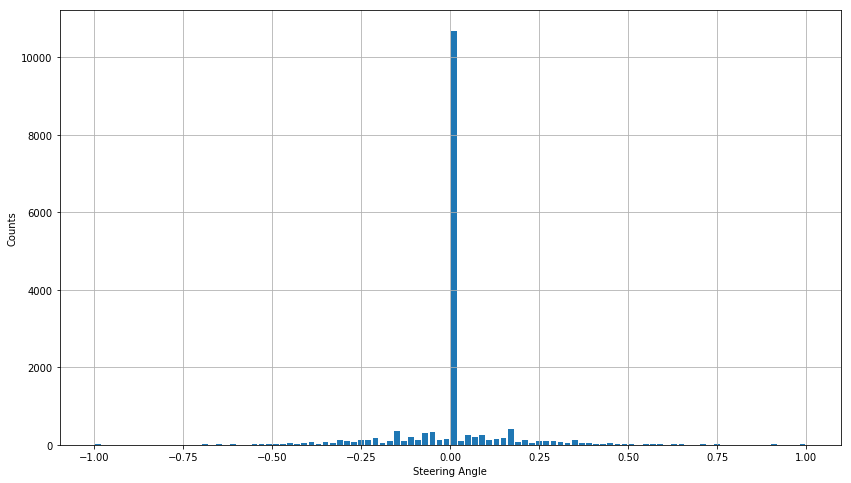

In [5]:
print("Stats:")
print(measurements.steering.describe())
print("s=0 Steering:", measurements.steering.iloc[measurements.steering.values==0].count())
print("s>0 Steering:", measurements.steering.iloc[measurements.steering.values>0].count())
print("s<0 Steering:", measurements.steering.iloc[measurements.steering.values<0].count())

measurements.steering.hist(bins=100, rwidth=0.8, figsize=[14,8])
plt.xlabel('Steering Angle')
plt.ylabel('Counts')
plt.show()

#### Keras Data Generator
We have thousands of training examples and it is not possible to store all the images into memory. We will utilize a  generator function to sample images such that images with lower angles have lower probability of getting represented in the dataset. 

This solves  problems we may have due to model having a bias towards driving straight.

Given a line from csv file, this function randomly loads center or left or right image. Then it randomly flips the image.

The ‘threshold’ determines if a data point with small angle will be dropped.

In [6]:
batches = []
threshold = 1
CAMERA_OFFSET = 0.25

def load_and_augment_image(line_data, read_images):
    i = np.random.randint(3)
    
    # Choose one of the camera angles at random.     
    if (i == 0):
        path_file = line_data['left'][0].strip()
        shift_angle = CAMERA_OFFSET
    elif (i == 1):
        path_file = line_data['center'][0].strip()
        shift_angle = 0.
    elif (i == 2):
        path_file = line_data['right'][0].strip()
        shift_angle = -CAMERA_OFFSET
        
    steering_angle = line_data['steering'][0] + shift_angle
    
    img = None
    if read_images:
        img = cv2.imread(os.path.join(DATA_DIR, "IMG", path_file.split("/")[-1]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Flip one of the images at random.     
    if np.random.random() < 0.5:
        if read_images:
            img = cv2.flip(img, 1)
        steering_angle = steering_angle * -1.0

    return img, steering_angle

def generate_batch_data(data, batch_size = 32, read_images=True):
    
    while 1:
        images = []
        measurement = []
        for batch_index in range(batch_size):
            row_index = np.random.randint(len(data))
            line_data = data.iloc[[row_index]].reset_index()
            
            # idea borrowed from Vivek Yadav: Sample images such that images with lower angles 
            # have lower probability of getting represented in the dataset. This alleviates 
            # any problems we may ecounter due to model having a bias towards driving straight.
            
            keep = 0
            while keep == 0:
                x, y = load_and_augment_image(line_data, read_images)
                if abs(y) < .1:
                    val = np.random.uniform()
                    if val > threshold:
                        keep = 1
                else:
                    keep = 1
            
            images.append(x)
            measurement.append(y)
            batches.append(y)
        yield np.array(images), np.array(measurement)


To make sure that the generator works as intended, we generate some images and plot them.

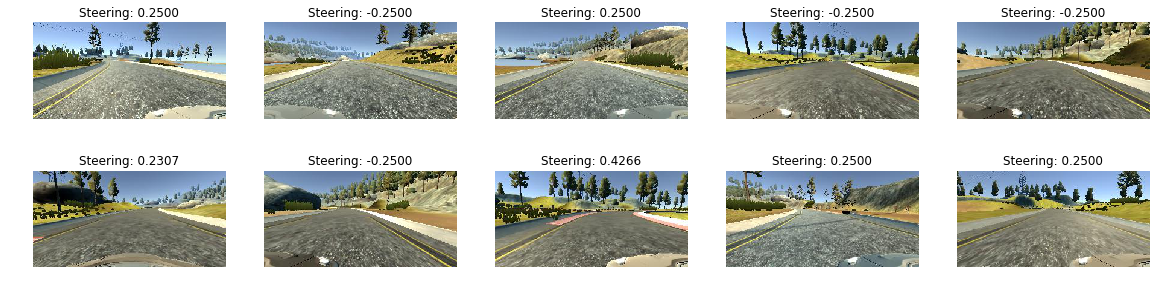

In [7]:
iterator = generate_batch_data(measurements, batch_size=10)
sample_images, sample_steerings = iterator.__next__()

plt.subplots(figsize=(20, 5))
for i, img in enumerate(sample_images):
    plt.subplot(2, 5, i+1)
    plt.axis('off')
    plt.title("Steering: {:.4f}".format(sample_steerings[i]))
    plt.imshow(img)
plt.show()

This cell shows that the distribution of samples from the generator is spread nicely between steering right and steering left. This helps the car to stay on track and round corners nicely.

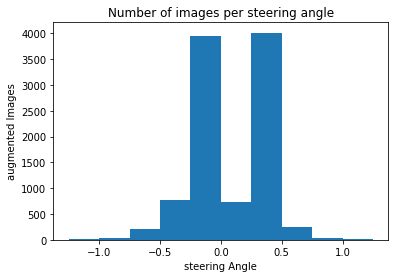

In [8]:
iterator = generate_batch_data(measurements, batch_size=100, read_images=False)
for _ in range(100):
    iterator.__next__()

plt.hist(batches)
plt.title('Number of images per steering angle')
plt.xlabel('steering Angle')
plt.ylabel('augmented Images')
plt.show()

# Training the model

I chose to try out 2 popular models for self driving cars. The first one is from Nvidia (https://devblogs.nvidia.com/deep-learning-self-driving-cars/) and the other one is from Comma.ai (https://github.com/commaai/research/blob/master/train_steering_model.py). 

I trained them for 20 epochs with a batch size of 256.


In [9]:
batch_size = 256
train_samples, validation_samples = train_test_split(measurements)
train_generator = generate_batch_data(train_samples, batch_size=batch_size)
validation_generator = generate_batch_data(validation_samples, batch_size=batch_size)

In [10]:
sample_images, sample_steerings = train_generator.__next__()
sample_images.shape, sample_steerings.shape

((256, 160, 320, 3), (256,))

In [11]:
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Convolution2D, ELU, Dropout, Activation, Conv2D
from keras.models import Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


## NVidia Model

In [12]:
row, col, ch = 160, 320, 3
nvidia_model = Sequential()
nvidia_model.add(Lambda(lambda x: x / 127.5 - 1., input_shape=(row, col, ch), output_shape=(row, col, ch)))
nvidia_model.add(Cropping2D(cropping=((70, 25), (0, 0))))
nvidia_model.add(Conv2D(24, (5, 5), strides=(2, 2), kernel_regularizer='l2', dim_ordering='tf'))
nvidia_model.add(Activation('relu'))
nvidia_model.add(Conv2D(36, (5, 5), strides=(2, 2), kernel_regularizer='l2', dim_ordering='tf'))
nvidia_model.add(Activation('relu'))
nvidia_model.add(Conv2D(48, (5, 5), strides=(2, 2), kernel_regularizer='l2', dim_ordering='tf'))
nvidia_model.add(Activation('relu'))
nvidia_model.add(Conv2D(64, (3, 3), strides=(1, 1), kernel_regularizer='l2', dim_ordering='tf'))
nvidia_model.add(Activation('relu'))
nvidia_model.add(Conv2D(64, (3, 3), strides=(1, 1), kernel_regularizer='l2', dim_ordering='tf'))
nvidia_model.add(Activation('relu'))

nvidia_model.add(Flatten())
nvidia_model.add(Dense(100, name='fc1'))
nvidia_model.add(Activation('relu'))
nvidia_model.add(Dropout(0.1))

nvidia_model.add(Dense(50, name='fc2'))
nvidia_model.add(Activation('relu'))
nvidia_model.add(Dropout(0.1))

nvidia_model.add(Dense(10, name='fc3'))
nvidia_model.add(Activation('relu'))
nvidia_model.add(Dense(1, name='output'))

# for a mean squared error regression problem
nvidia_model.compile(optimizer=Adam(lr=0.0001), loss='mean_squared_error')

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), data_format="channels_last", kernel_regularizer="l2", strides=(2, 2))`
  """
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), data_format="channels_last", kernel_regularizer="l2", strides=(2, 2))`
  import sys
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), data_format="channels_last", kernel_regularizer="l2", strides=(2, 2))`
  if __name__ == '__main__':
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), data_format="channels_last", kernel_regularizer="l2", 

The model is summarized below. It has the following layers in addition to the layers shown in the image below

* A normalization layer that normalized the image input
* A cropping layer that crops the hood and the sky (which are just noise)
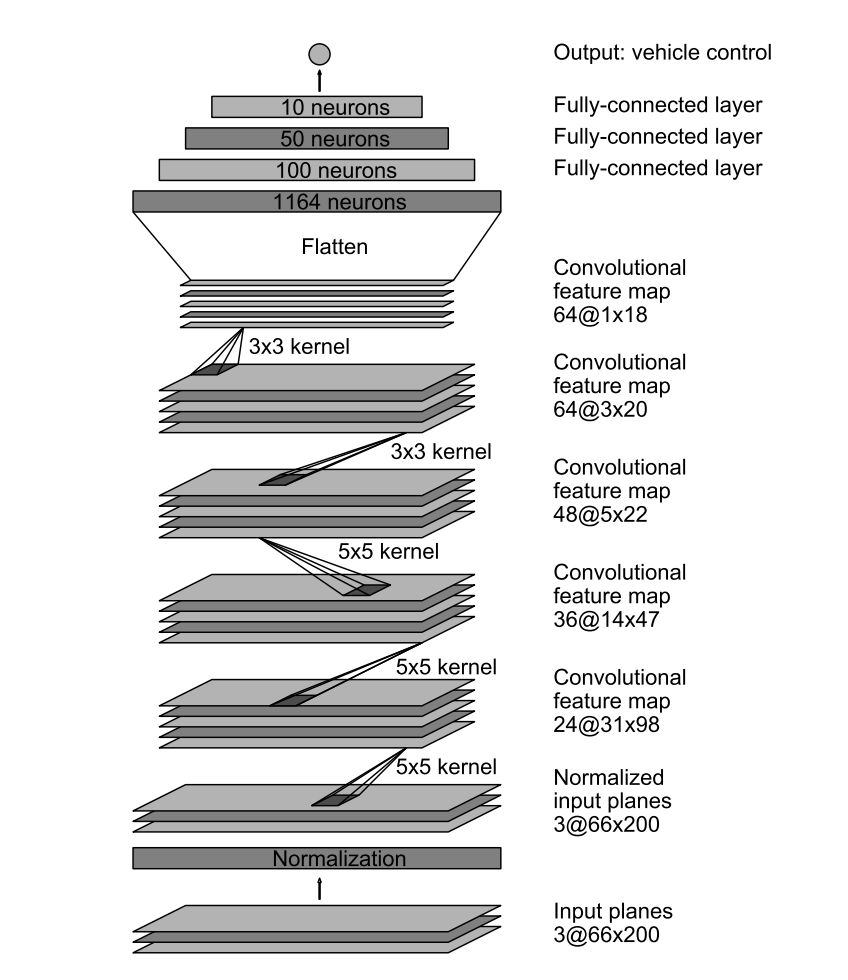

In [13]:
nvidia_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 65, 320, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 158, 24)       1824      
_________________________________________________________________
activation_1 (Activation)    (None, 31, 158, 24)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 77, 36)        21636     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 77, 36)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 37, 48)         43248     
__________

In [14]:
nvidia_history= nvidia_model.fit_generator(train_generator,
                                         steps_per_epoch=len(train_samples) / batch_size,
                                         validation_data=validation_generator,
                                         validation_steps=len(validation_samples) / batch_size,
                                         epochs=20, 
                                         verbose=1)

nvidia_model.save('nvidia_model.h5')

Epoch 1/20
49/48 [==============================] - 59s 1s/step - loss: 1.8308 - val_loss: 1.6258
Epoch 2/20
49/48 [==============================] - 51s 1s/step - loss: 1.4680 - val_loss: 1.3149
Epoch 3/20
49/48 [==============================] - 62s 1s/step - loss: 1.1885 - val_loss: 1.0650
Epoch 4/20
49/48 [==============================] - 55s 1s/step - loss: 0.9617 - val_loss: 0.8612
Epoch 5/20
49/48 [==============================] - 53s 1s/step - loss: 0.7774 - val_loss: 0.6967
Epoch 6/20
49/48 [==============================] - 53s 1s/step - loss: 0.6284 - val_loss: 0.5626
Epoch 7/20
49/48 [==============================] - 54s 1s/step - loss: 0.5081 - val_loss: 0.4577
Epoch 8/20
49/48 [==============================] - 53s 1s/step - loss: 0.4115 - val_loss: 0.3706
Epoch 9/20
49/48 [==============================] - 53s 1s/step - loss: 0.3353 - val_loss: 0.3036
Epoch 10/20
49/48 [==============================] - 53s 1s/step - loss: 0.2728 - val_loss: 0.2493
Epoch 11/20
49/48 [

dict_keys(['val_loss', 'loss'])


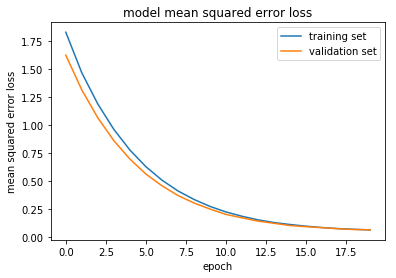

In [15]:
print(nvidia_history.history.keys())

import matplotlib.pyplot as plt

# plot the training and validation loss for each epoch
plt.plot(nvidia_history.history['loss'])
plt.plot(nvidia_history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.savefig("nvidia_training_log.jpeg")

## Comma.ai model

The Comma.ai network structure can be summarized as follows:

* A normalization layer that normalized the image input
* A cropping layer that crops the hood and the sky (which are just noise)
* Convolutional layer, 16 feature maps with a size of 8×8, an Exponential Linear Unit(elu) activation function.
* Convolutional layer, 32 feature maps with a size of 5×5, an elu activation function.
* Convolutional layer, 64 feature maps with a size of 5×5, an elu activation function.
* Flatten layer.
* Dropout set to 20%.
* ELU non-linearity layer
* Fully connected layer with 512 units and a elu activation function.
* Dropout set to 50%.
* ELU non-linearity layer
* Fully connected output layer with 1 unit and no activation function as this is a regression problem, not classification.
* A 'mean_squared_error' loss function is used with Adam optimization algorithm configured with a learning rate of 0.0001. 

In [16]:
ch, row, col = 160, 320, 3

comma_ai_model = Sequential()
comma_ai_model.add(Lambda(lambda x: x / 127.5 - 1., input_shape=(ch, row, col), output_shape=(ch, row, col)))
comma_ai_model.add(Cropping2D(cropping=((70, 25), (0, 0))))
comma_ai_model.add(Convolution2D(16, 8, 8, subsample=(4, 4), border_mode="same"))
comma_ai_model.add(ELU())
comma_ai_model.add(Convolution2D(32, 5, 5, subsample=(2, 2), border_mode="same"))
comma_ai_model.add(ELU())
comma_ai_model.add(Convolution2D(64, 5, 5, subsample=(2, 2), border_mode="same"))
comma_ai_model.add(Flatten())
comma_ai_model.add(Dropout(.2))
comma_ai_model.add(ELU())
comma_ai_model.add(Dense(512))
comma_ai_model.add(Dropout(.5))
comma_ai_model.add(ELU())
comma_ai_model.add(Dense(1))

opt = Adam(lr=0.0001)
comma_ai_model.compile(optimizer=opt, loss='mse', metrics=[])
comma_ai_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_2 (Cropping2D)    (None, 65, 320, 3)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 80, 16)        3088      
_________________________________________________________________
elu_1 (ELU)                  (None, 17, 80, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 40, 32)         12832     
_________________________________________________________________
elu_2 (ELU)                  (None, 9, 40, 32)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 20, 64)         51264     
__________

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (8, 8), strides=(4, 4), padding="same")`
  
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), strides=(2, 2), padding="same")`
  
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), strides=(2, 2), padding="same")`
  # Remove the CWD from sys.path while we load stuff.


In [17]:
comma_ai_history = comma_ai_model.fit_generator(train_generator,
                                         steps_per_epoch=len(train_samples) / batch_size,
                                         validation_data=validation_generator,
                                         validation_steps=len(validation_samples) / batch_size,
                                         epochs=20, 
                                         verbose=1)

comma_ai_model.save('comma_ai.h5')

Epoch 1/20
49/48 [==============================] - 59s 1s/step - loss: 0.0768 - val_loss: 0.0509
Epoch 2/20
49/48 [==============================] - 51s 1s/step - loss: 0.0583 - val_loss: 0.0495
Epoch 3/20
49/48 [==============================] - 50s 1s/step - loss: 0.0521 - val_loss: 0.0444
Epoch 4/20
49/48 [==============================] - 50s 1s/step - loss: 0.0498 - val_loss: 0.0476
Epoch 5/20
49/48 [==============================] - 50s 1s/step - loss: 0.0491 - val_loss: 0.0458
Epoch 6/20
49/48 [==============================] - 51s 1s/step - loss: 0.0470 - val_loss: 0.0448
Epoch 7/20
49/48 [==============================] - 51s 1s/step - loss: 0.0443 - val_loss: 0.0415
Epoch 8/20
49/48 [==============================] - 50s 1s/step - loss: 0.0428 - val_loss: 0.0465
Epoch 9/20
49/48 [==============================] - 52s 1s/step - loss: 0.0437 - val_loss: 0.0411
Epoch 10/20
49/48 [==============================] - 52s 1s/step - loss: 0.0438 - val_loss: 0.0431
Epoch 11/20
49/48 [

dict_keys(['val_loss', 'loss'])


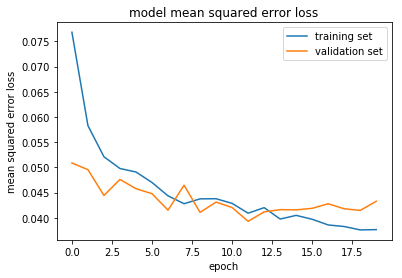

In [18]:
print(comma_ai_history.history.keys())

import matplotlib.pyplot as plt

# plot the training and validation loss for each epoch
plt.plot(comma_ai_history.history['loss'])
plt.plot(comma_ai_history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.savefig("comma_ai_training_log.jpeg")

# Output video

A video that shows the nvidia model driving around track 1 is here [output_video/nvidia.mp4](output_video/nvidia.mp4)

# Conclusion and discussion

This project was very interesting, it shows how powerful CNN architecture are. I finished this project last because I had issues with the AWS setup and the project is tedious without a GPU. But this project gave me an appreciation of how much deep learning models do for you. In the last few projects, we used the classic Computer Vision techniques and the feature engineering is very time consuming and requires a lot of domain expertise. 

However, training CNN models require a lot of processing power and it very time consuming to search for the right hyperparameters. Also, testing whether the model is good or not requires running the model on the simulator and visually inspecting whether the car drives correctly or not. Having an automated way of testing this would help in hyperparameter tuning.